In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from numpy.random import multivariate_normal,permutation
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160614)
tf.set_random_seed(20160614)

%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w0 = tf.Variable(tf.zeros([num_units,10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.arg_max(p, 1), tf.arg_max(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Use `argmax` instead


In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i=0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:mnist.test.images,t:mnist.test.labels})
        print ('Step:%d, Loss:%f, Accuracy:%f' % (i, loss_val, acc_val) )

Step:100, Loss:2807.830322, Accuracy:0.924600
Step:200, Loss:2128.927979, Accuracy:0.937300
Step:300, Loss:1865.519287, Accuracy:0.942900
Step:400, Loss:1736.343262, Accuracy:0.948800
Step:500, Loss:1518.780518, Accuracy:0.952100
Step:600, Loss:1588.136230, Accuracy:0.955200
Step:700, Loss:1397.970093, Accuracy:0.959300
Step:800, Loss:1339.284668, Accuracy:0.960600
Step:900, Loss:1162.292603, Accuracy:0.964800
Step:1000, Loss:1594.068970, Accuracy:0.951800
Step:1100, Loss:1213.702148, Accuracy:0.962700
Step:1200, Loss:1093.674805, Accuracy:0.969000
Step:1300, Loss:1148.302734, Accuracy:0.965900
Step:1400, Loss:1024.661499, Accuracy:0.971400
Step:1500, Loss:1186.956299, Accuracy:0.966800
Step:1600, Loss:1155.109619, Accuracy:0.968200
Step:1700, Loss:958.178223, Accuracy:0.971300
Step:1800, Loss:998.880493, Accuracy:0.970500
Step:1900, Loss:1026.330811, Accuracy:0.968900
Step:2000, Loss:1088.094604, Accuracy:0.969800


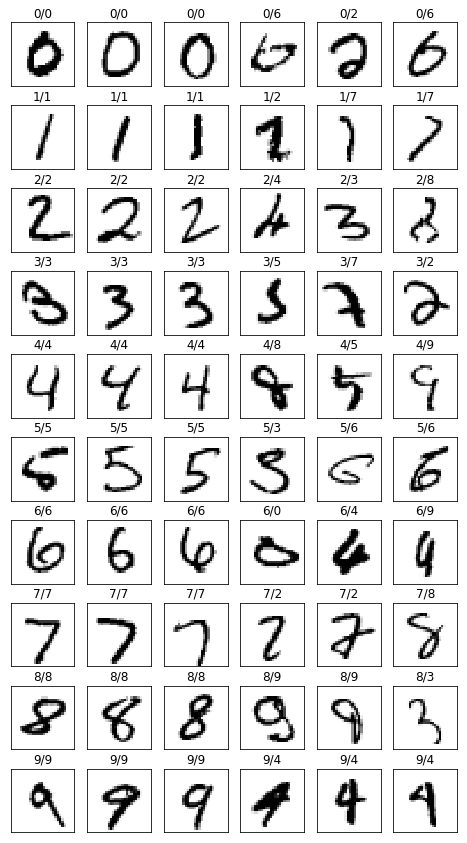

In [8]:
images, labels = mnist.test.images,mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
fig = plt.figure(figsize = (8,15))

for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
#         print(i)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d/%d' % (prediction,actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break